In [1]:
''''
IST 652 Final project
Team names: Daylin Hernandez, Jessica Krumm, Zimra Panitz
Topic: Life expectancy 
'''

"'\nIST 652 Final project\nTeam names: Daylin Hernandez, Jessica Krumm, Zimra Panitz\nTopic: Life expectancy \n"

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import plotly.express as px
import statsmodels.api as sm

First 5 rows of df1:
       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria   HIV/AIDS         GDP  P

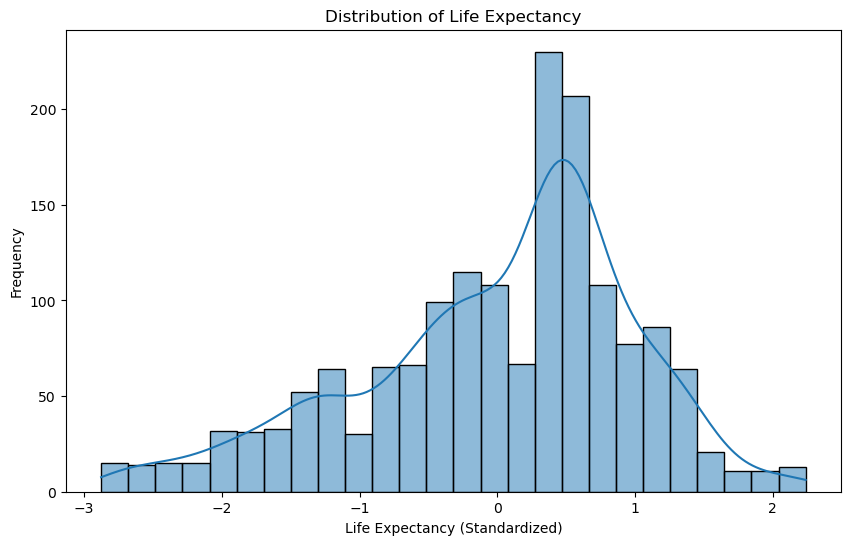

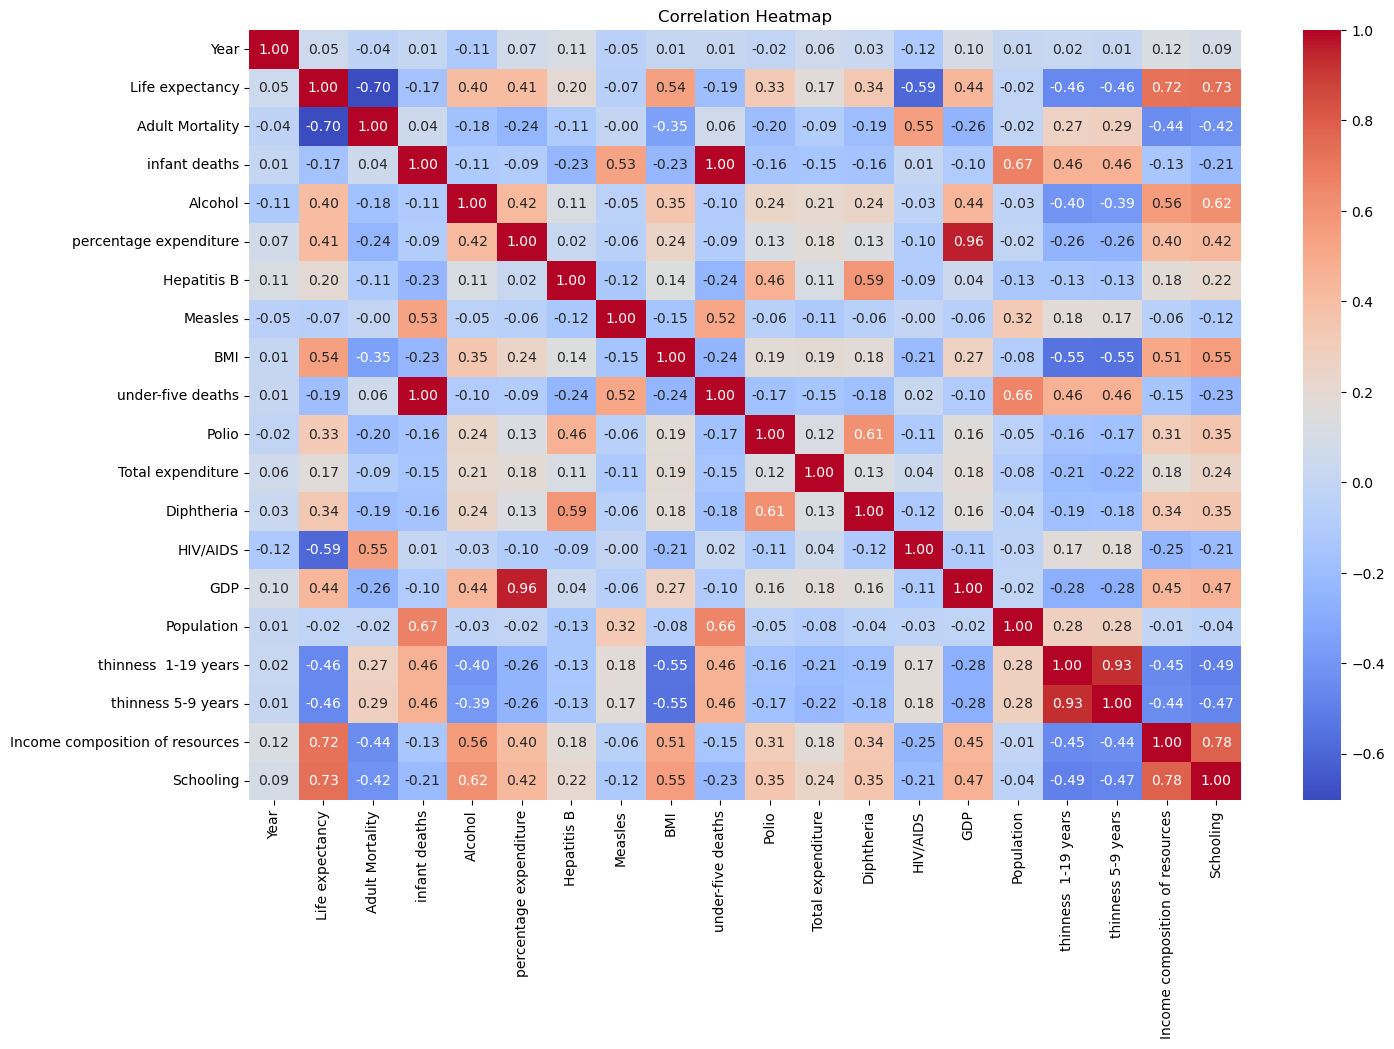

Exploratory Data Analysis for df2:


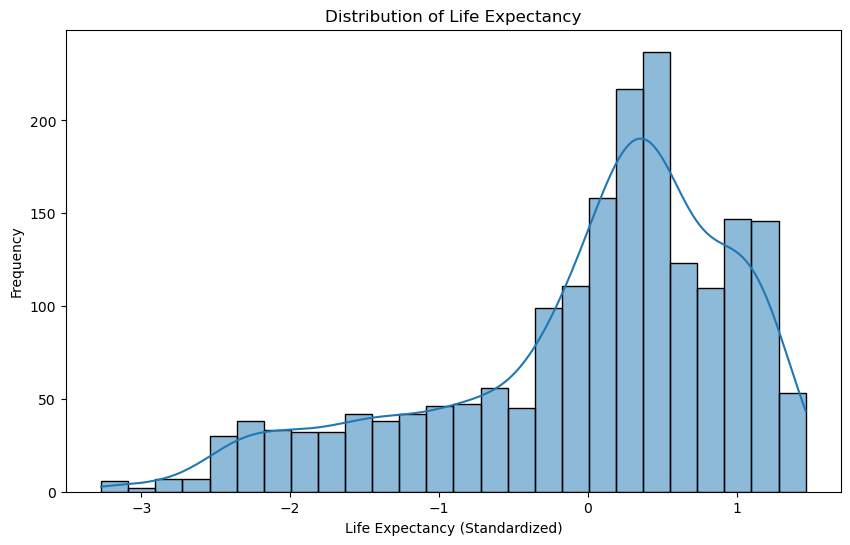

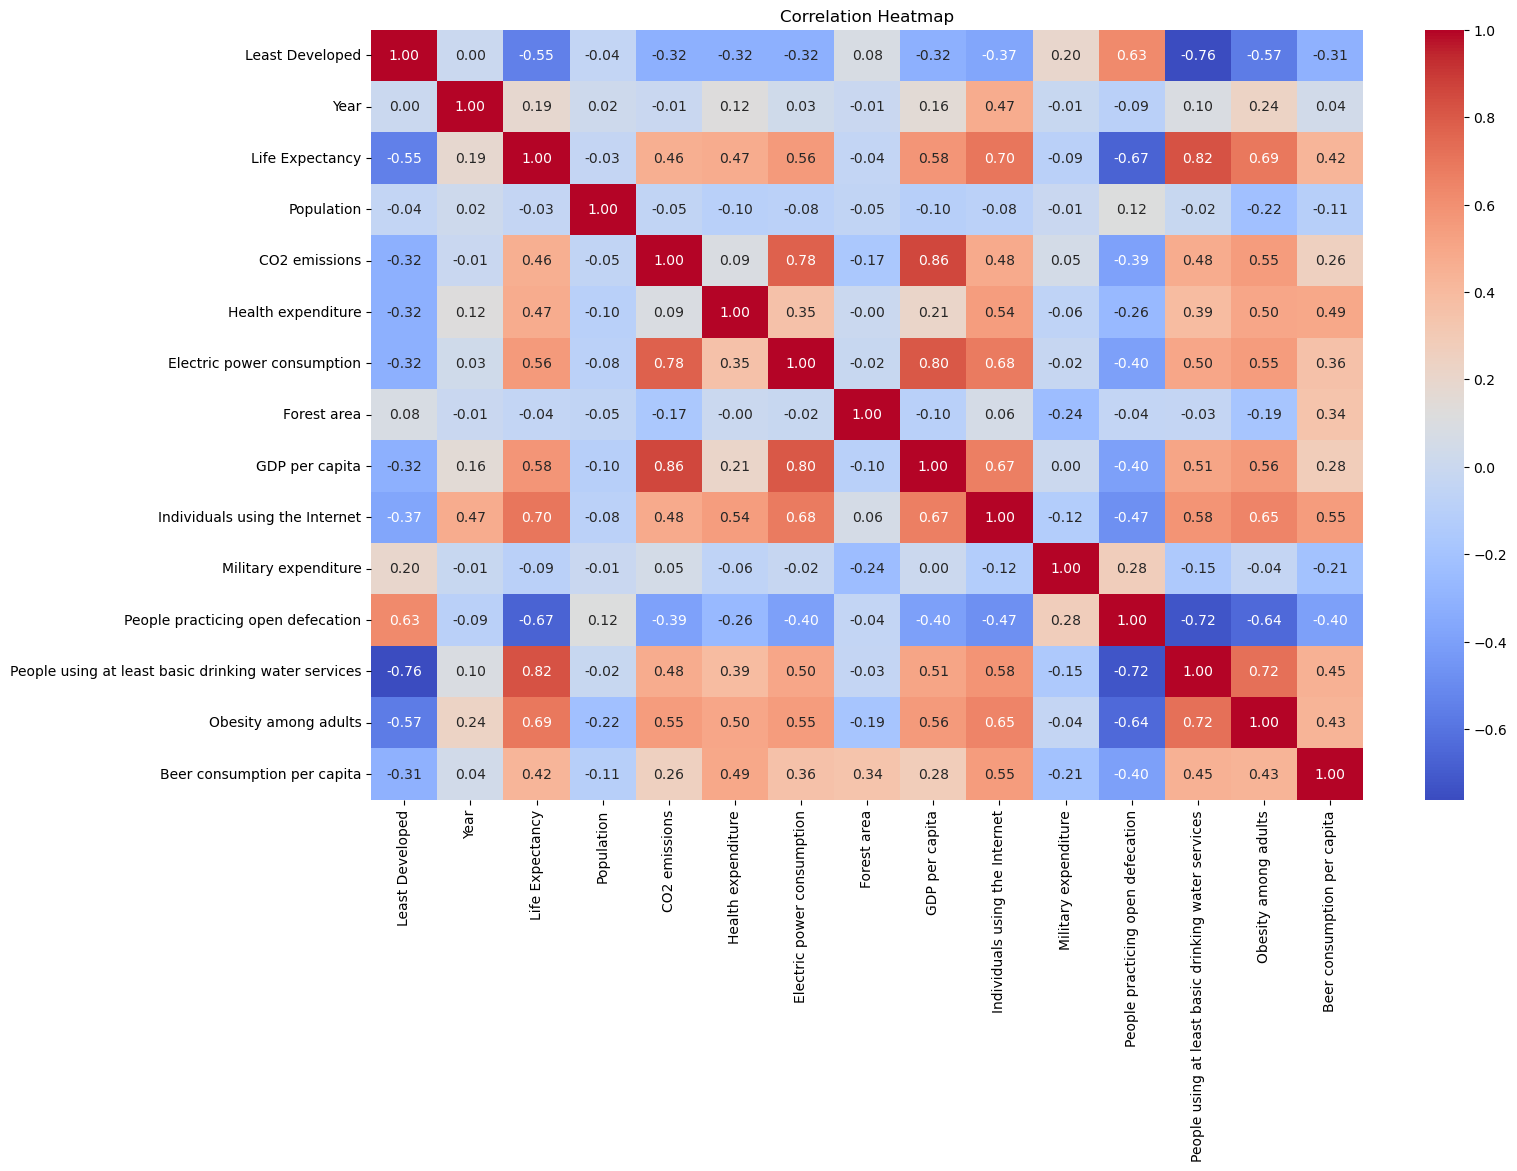

Life Expectancy by Country for df1:
Life Expectancy Summary by Country:
                  mean    median       std       min       max
Country                                                       
Ireland       1.607622  1.671301  0.255990  1.330165  1.898724
Canada        1.470410  1.392707  0.253635  1.182340  2.012436
France        1.467378  1.387021  0.372717  1.080000  2.239859
Italy         1.461313  1.398392  0.313743  1.148227  2.239859
Spain         1.446151  1.398392  0.327831  1.114113  2.239859
...                ...       ...       ...       ...       ...
Angola       -2.118143 -2.160785  0.282993 -2.399580 -1.512628
Malawi       -2.165159 -2.194899  0.542520 -2.877169 -1.330689
Zimbabwe     -2.264642 -2.581519  0.614853 -2.843056 -1.148751
Lesotho      -2.353148 -2.354095  0.369566 -2.820313 -1.933362
Sierra Leone -2.373995 -2.410951  0.302735 -2.729344 -1.740052

[133 rows x 5 columns]


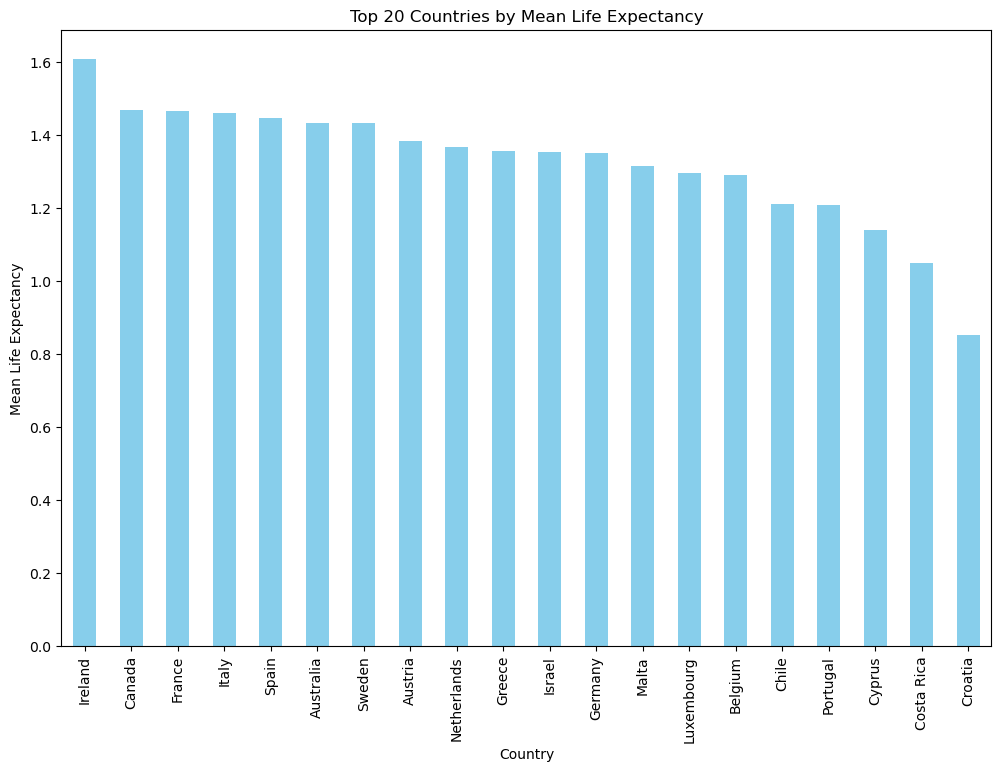

Life Expectancy by Country for df2:
Life Expectancy Summary by Country:
                   mean    median       std       min       max
Country                                                        
Switzerland    1.280123  1.301964  0.127153  1.044324  1.458732
Italy          1.246247  1.253971  0.121816  1.055819  1.446087
Australia      1.215515  1.240320  0.116176  0.991732  1.364758
Spain          1.211420  1.202673  0.166958  0.960120  1.462468
Sweden         1.199044  1.199799  0.102658  1.040013  1.347514
...                 ...       ...       ...       ...       ...
Angola        -2.120224 -2.133546  0.516225 -2.862664 -1.345515
Cote d'Ivoire -2.224082 -2.289491  0.274809 -2.514719 -1.738234
Mozambique    -2.229163 -2.321717  0.294117 -2.577050 -1.603793
Nigeria       -2.501566 -2.494924  0.270134 -2.892710 -2.086180
Zimbabwe      -2.608650 -2.956514  0.706860 -3.269994 -1.329490

[119 rows x 5 columns]


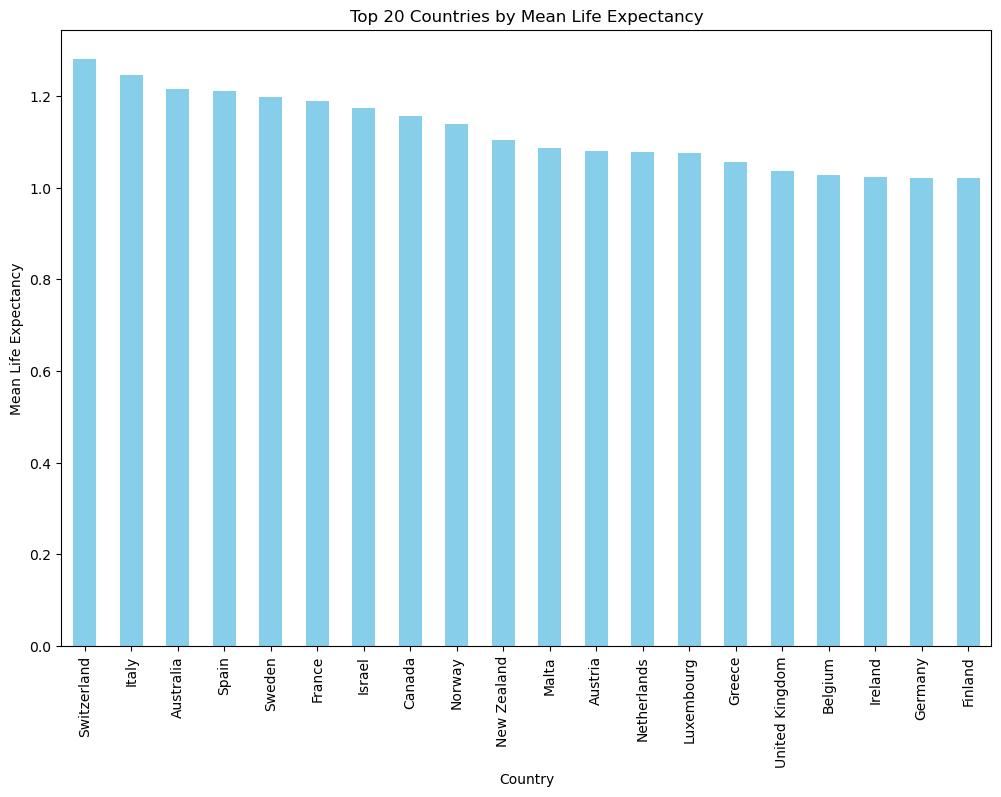

In [150]:
# Load the two structured datasets 
df1 = pd.read_csv('C:/Users/Daylin/Desktop/Syracuse/IST-652 Scripting for Data Analytics/final project/life_expectancy_who.csv')
df2 = pd.read_csv('C:/Users/Daylin/Desktop/Syracuse/IST-652 Scripting for Data Analytics/final project/life_expectancy_2000_2015.csv')

# Show preliminary information for both datasets
print("First 5 rows of df1:")
print(df1.head())

print("\nInformation about df1:")
df1.info()

print("\nFirst 5 rows of df2:")
print(df2.head())

print("\nInformation about df2:")
df2.info()

# Function to clean the dataset
def load_and_clean_data(df):
    df.columns = df.columns.str.strip()  # Remove any trailing spaces
    df_cleaned = df.dropna()  # Drop rows with missing values
    return df_cleaned

# Function to encode categorical variables and scale numerical features
def encode_and_scale(df):
    label_encoder = LabelEncoder()
    scaler = StandardScaler()
    
    # Encode the 'Status' column if it exists
    if 'Status' in df.columns:
        df.loc[:, 'Status'] = label_encoder.fit_transform(df['Status'])
    
    # Identify numerical columns
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
    
    # Scale numerical features and create a new DataFrame for scaled values
    scaled_df = pd.DataFrame(scaler.fit_transform(df[numerical_columns]), columns=numerical_columns, index=df.index)
    
    # Drop the original numerical columns from the original DataFrame
    df_non_numeric = df.drop(columns=numerical_columns)
    
    # Combine the non-numerical data with the scaled numerical data
    df_scaled = pd.concat([df_non_numeric, scaled_df], axis=1)
    
    return df_scaled

# Function for Exploratory Data Analysis (EDA)
def exploratory_data_analysis(df, life_expectancy_column):
    # Distribution of Life Expectancy
    plt.figure(figsize=(10, 6))
    sns.histplot(df[life_expectancy_column], kde=True)
    plt.title('Distribution of Life Expectancy')
    plt.xlabel('Life Expectancy (Standardized)')
    plt.ylabel('Frequency')
    plt.show()

    # Correlation heatmap of all numerical features (excluding 'Country')
    plt.figure(figsize=(16, 10))
    correlation_matrix = df.drop(columns=['Country']).corr(numeric_only=True)
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()

# Function to summarize and visualize life expectancy by country
def life_expectancy_by_country(df, life_expectancy_column):
    life_expectancy_summary = df.groupby('Country')[life_expectancy_column].agg(['mean', 'median', 'std', 'min', 'max']).sort_values(by='mean', ascending=False)
    
    # Display the summary
    print("Life Expectancy Summary by Country:")
    print(life_expectancy_summary)

    # Plot the mean life expectancy by country (Top 20 countries)
    plt.figure(figsize=(12, 8))
    life_expectancy_summary['mean'].head(20).plot(kind='bar', color='skyblue')
    plt.title('Top 20 Countries by Mean Life Expectancy')
    plt.xlabel('Country')
    plt.ylabel('Mean Life Expectancy')
    plt.xticks(rotation=90)
    plt.show()

# Main script 
if __name__ == "__main__":
    # Load and clean the data 
    df_cleaned1 = load_and_clean_data(df1)
    df_cleaned2 = load_and_clean_data(df2)
    
    # Encode and scale 
    df_cleaned1 = encode_and_scale(df_cleaned1)
    df_cleaned2 = encode_and_scale(df_cleaned2)
    
    # Perform EDA for both datasets
    print("Exploratory Data Analysis for df1:")
    exploratory_data_analysis(df_cleaned1, 'Life expectancy')
    
    print("Exploratory Data Analysis for df2:")
    exploratory_data_analysis(df_cleaned2, 'Life Expectancy')
    
    # Summarize and visualize life expectancy by country
    print("Life Expectancy by Country for df1:")
    life_expectancy_by_country(df_cleaned1, 'Life expectancy')
    
    print("Life Expectancy by Country for df2:")
    life_expectancy_by_country(df_cleaned2, 'Life Expectancy')


Linear Regression Analysis for df1:
                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     443.1
Date:                Sun, 25 Aug 2024   Prob (F-statistic):               0.00
Time:                        19:46:10   Log-Likelihood:                -839.70
No. Observations:                1649   AIC:                             1719.
Df Residuals:                    1629   BIC:                             1828.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

C:\Users\Daylin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.



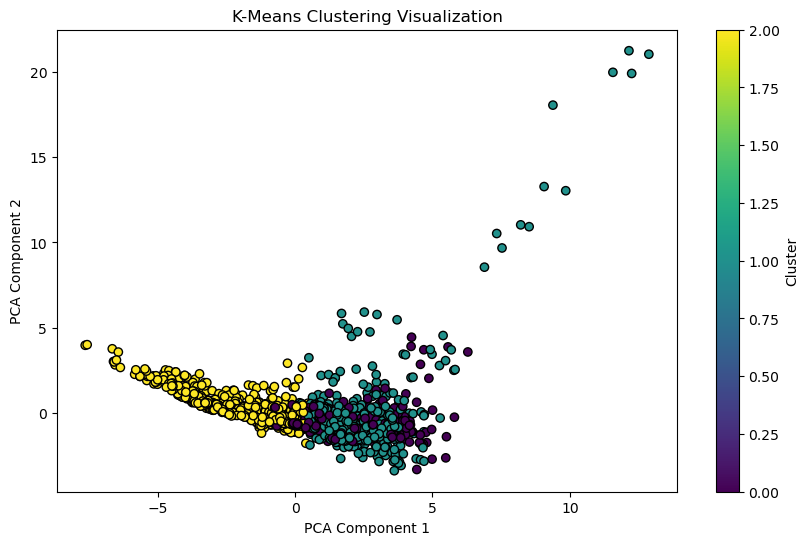

K-Means Clustering for df2:
Cluster Summary:
                    Year  Life Expectancy  Population  CO2 emissions  \
kMeans_Cluster                                                         
0              -0.120567        -1.339405    0.340964      -0.748691   
1              -0.118414         0.190592   -0.096582      -0.194163   
2               0.312198         0.908522   -0.149586       1.018913   

                Health expenditure  Electric power consumption  Forest area  \
kMeans_Cluster                                                                
0                        -0.688751                   -0.756348     0.011188   
1                        -0.038449                   -0.304697     0.009985   
2                         0.699104                    1.213825    -0.027266   

                GDP per capita  Individuals using the Internet  \
kMeans_Cluster                                                   
0                    -0.770674                       -0.906761   


C:\Users\Daylin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.



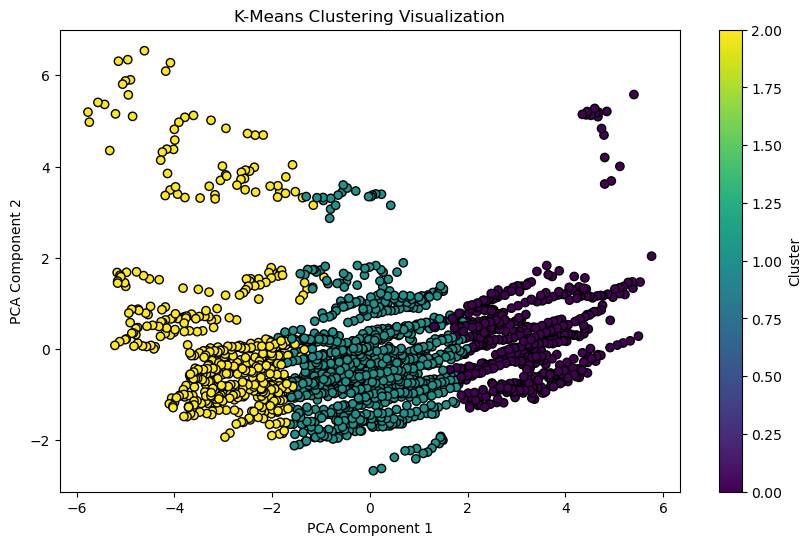

Hierarchical Agglomerative Clustering for df1:


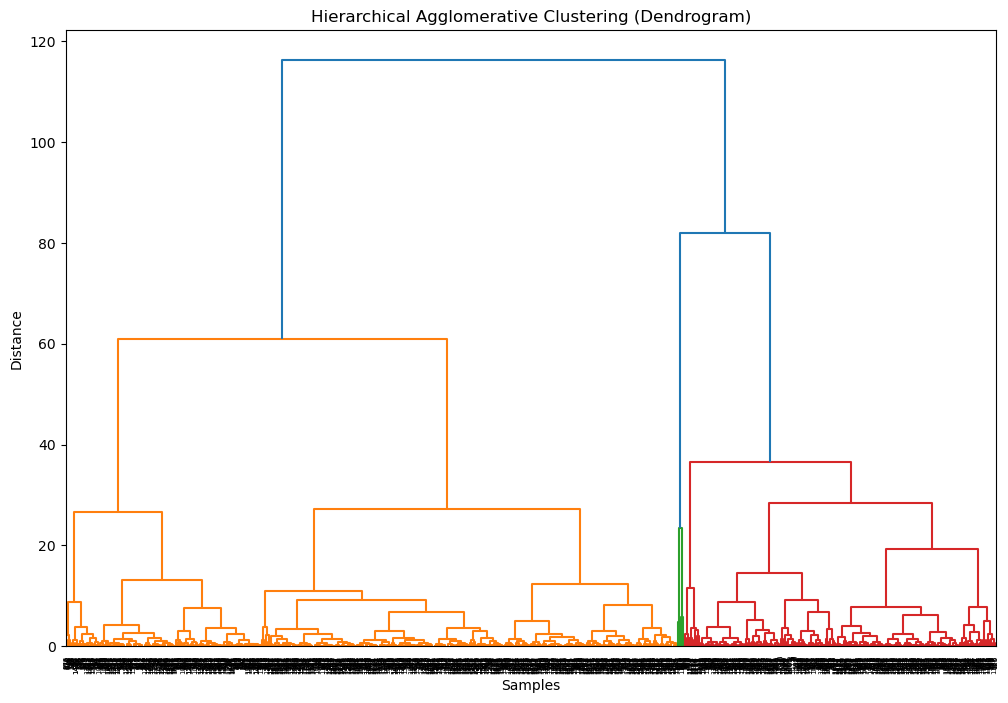

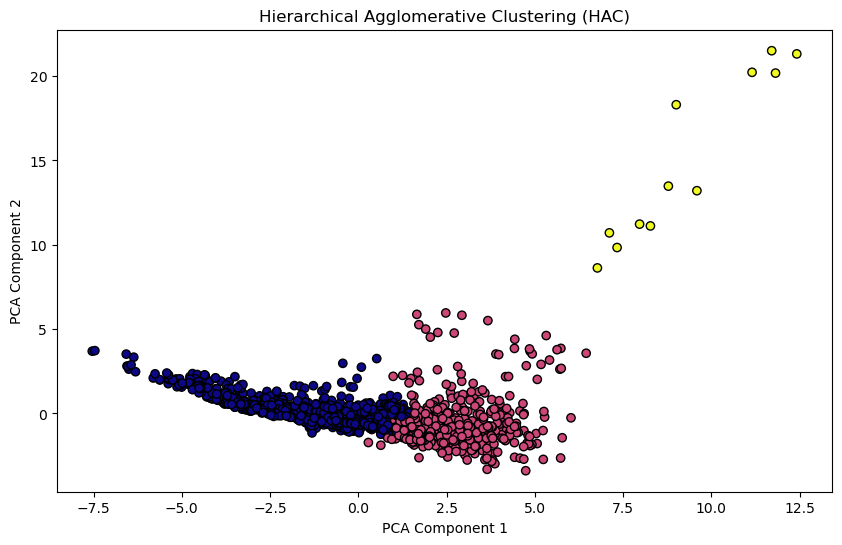

Hierarchical Agglomerative Clustering for df2:


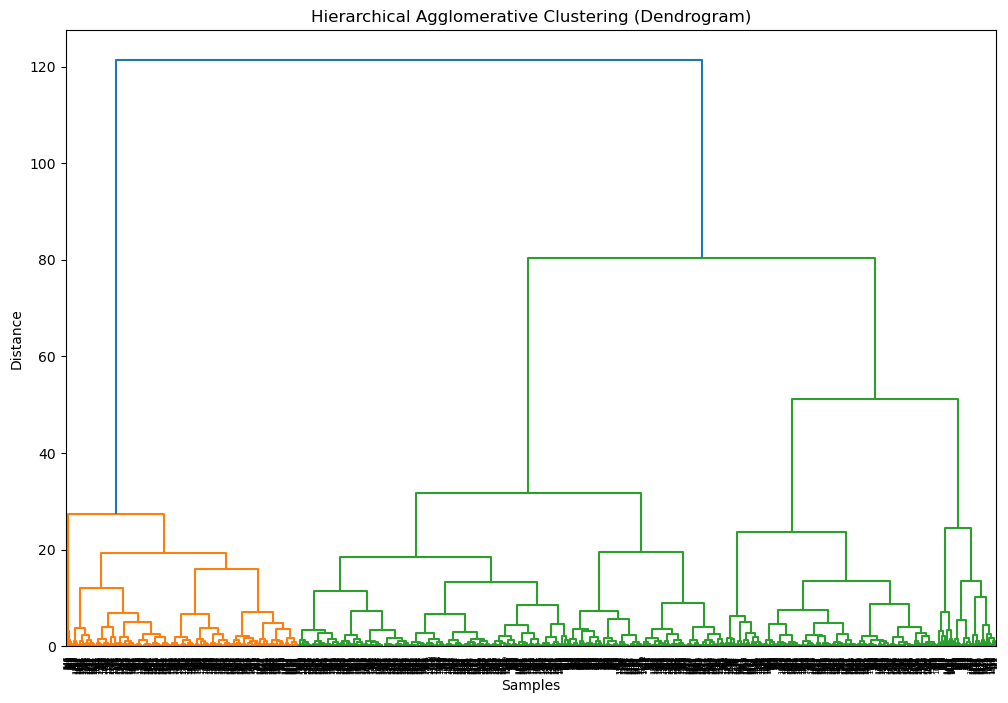

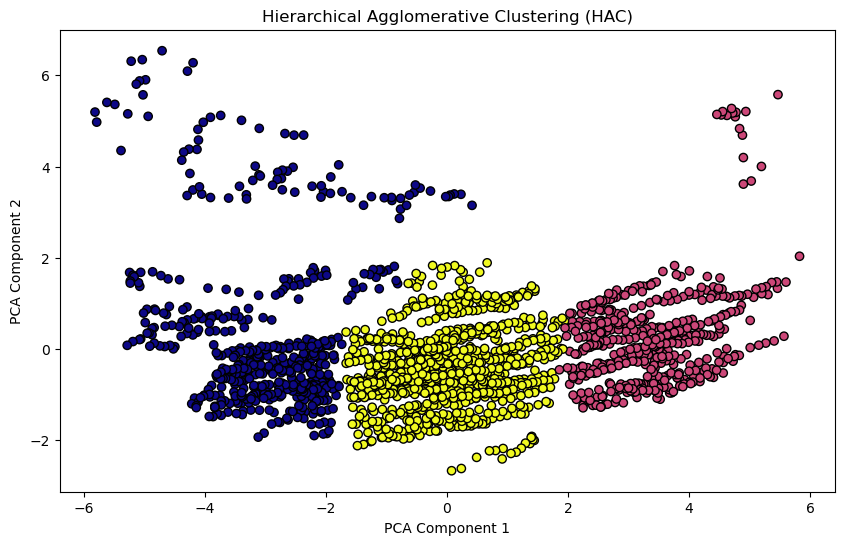

Choropleth Map for df1:


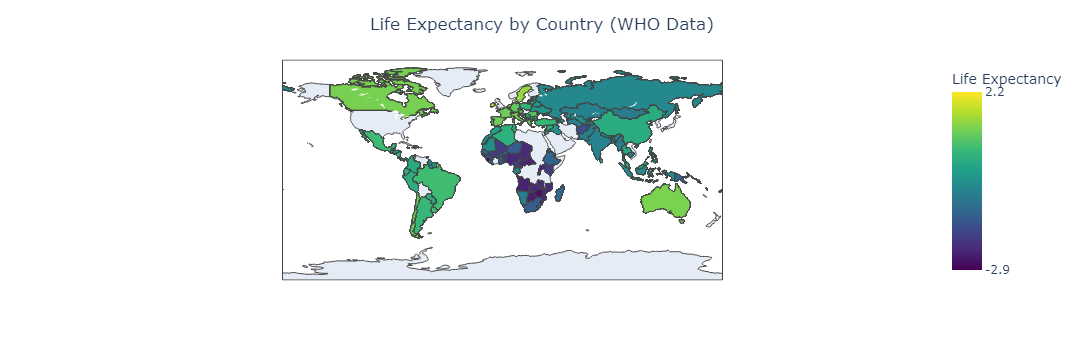

Choropleth Map for df2:


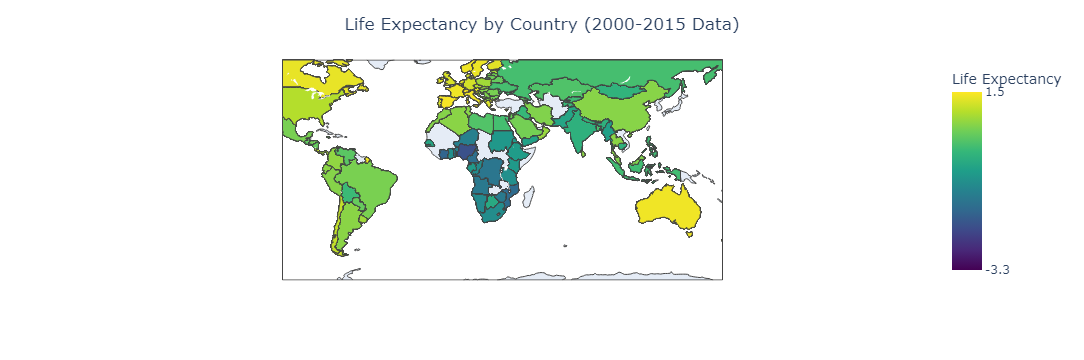

In [152]:
# Function to perform linear regression and identify important variables
def linear_regression_model(df, life_expectancy_column):
    # Drop non-numeric columns, except for 'Country' and the target column
    X = df.drop(columns=['Country', life_expectancy_column])
    X = X.select_dtypes(include=[np.number])  # Keep only numeric columns
    
    y = df[life_expectancy_column]

    # Add a constant to the model (intercept)
    X = sm.add_constant(X)

    # Fit the model using statsmodels
    model = sm.OLS(y, X).fit()

    # Print the summary of the regression
    print(model.summary())

    # Predict on the dataset 
    y_pred = model.predict(X)

    # Calculate and print MAE, MSE, and R-squared
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared (R²): {r2}")

    # Identify and print important variables based on p-values
    significant_vars = model.pvalues[model.pvalues < 0.05].index.tolist()
    print("\nSignificant variables impacting Life Expectancy (p < 0.05):")
    print(significant_vars)

# Function to perform K-Means clustering and visualize results
def kmeans_clustering(df, life_expectancy_column):
    # Exclude non-numeric columns
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    df_numeric = df[numeric_columns]
    
    # Perform K-Means clustering
    kmeans = KMeans(n_clusters=3, random_state=42)
    df['kMeans_Cluster'] = kmeans.fit_predict(df_numeric)
    
    # Summarize clusters by their mean values for numeric columns
    cluster_summary = df.groupby('kMeans_Cluster')[numeric_columns].mean()
    print("Cluster Summary:")
    print(cluster_summary)
    
    # Perform PCA to reduce dimensionality to 2 components
    pca = PCA(n_components=2)
    df_pca = pca.fit_transform(df_numeric)
    
    # Visualize the clusters
    plt.figure(figsize=(10, 6))
    plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['kMeans_Cluster'], cmap='viridis', marker='o', edgecolor='k')
    plt.title('K-Means Clustering Visualization')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar(label='Cluster')
    plt.show()

# Function to perform HAC and visualize results
def hierarchical_clustering(df):
    # Exclude non-numeric columns before performing PCA
    numeric_df = df.select_dtypes(include=[np.number])
    
    # Perform PCA to reduce dimensionality to 2 components
    pca = PCA(n_components=2)
    df_pca = pca.fit_transform(numeric_df)

    # Hierarchical Agglomerative Clustering (HAC)
    linked = linkage(df_pca, method='ward')

    # Dendrogram
    plt.figure(figsize=(12, 8))
    dendrogram(linked, orientation='top', distance_sort='ascending', show_leaf_counts=False)
    plt.title('Hierarchical Agglomerative Clustering (Dendrogram)')
    plt.xlabel('Samples')
    plt.ylabel('Distance')
    plt.show()

    # Apply HAC with 3 clusters
    hac = AgglomerativeClustering(n_clusters=3)
    hac_clusters = hac.fit_predict(df_pca)

    # Plot the HAC clusters
    plt.figure(figsize=(10, 6))
    plt.scatter(df_pca[:, 0], df_pca[:, 1], c=hac_clusters, cmap='plasma', marker='o', edgecolor='k')
    plt.title('Hierarchical Agglomerative Clustering (HAC)')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.show()
    
# Function to visualize life expectancy by country using a choropleth map
def choropleth_map(df, life_expectancy_column, title='Life Expectancy by Country'):
    # Determine the actual range of life expectancy 
    min_life_expectancy = df[life_expectancy_column].min()
    max_life_expectancy = df[life_expectancy_column].max()
    
    # Create the choropleth map 
    fig = px.choropleth(
        df,
        locations="Country",
        locationmode='country names',
        color=life_expectancy_column,
        hover_name="Country",
        color_continuous_scale=px.colors.sequential.Viridis, 
        range_color=[min_life_expectancy, max_life_expectancy] 
    )
    
    fig.update_layout(
        title_text=title,
        title_x=0.5,
        coloraxis_colorbar=dict(
            title="Life Expectancy",
            tickvals=[min_life_expectancy, max_life_expectancy],
            ticktext=[f"{min_life_expectancy:.1f}", f"{max_life_expectancy:.1f}"]
        )
    )
    
    fig.show()




# Main script execution
if __name__ == "__main__":
    
    # Perform Linear Regression and identify important variables
    print("Linear Regression Analysis for df1:")
    linear_regression_model(df_cleaned1, 'Life expectancy')
    
    print("Linear Regression Analysis for df2:")
    linear_regression_model(df_cleaned2, 'Life Expectancy')
    
    # Perform K-Means clustering and visualize the results
    print("K-Means Clustering for df1:")
    kmeans_clustering(df_cleaned1, 'Life expectancy')
    
    print("K-Means Clustering for df2:")
    kmeans_clustering(df_cleaned2, 'Life Expectancy')
    
    # Perform Hierarchical Agglomerative Clustering and visualize the results
    print("Hierarchical Agglomerative Clustering for df1:")
    hierarchical_clustering(df_cleaned1)
    
    print("Hierarchical Agglomerative Clustering for df2:")
    hierarchical_clustering(df_cleaned2)
    
    # Visualize life expectancy by country using a choropleth map for both datasets
    print("Choropleth Map for df1:")
    choropleth_map(df_cleaned1, 'Life expectancy', title='Life Expectancy by Country (WHO Data)')
    
    print("Choropleth Map for df2:")
    choropleth_map(df_cleaned2, 'Life Expectancy', title='Life Expectancy by Country (2000-2015 Data)')


Identifying and plotting trends for the top 5 and bottom 5 countries in df1:
Top 5 countries with the highest life expectancy: ['Japan', 'Sweden', 'Iceland', 'Switzerland', 'France']
Bottom 5 countries with the lowest life expectancy: ['Sierra Leone', 'Central African Republic', 'Lesotho', 'Angola', 'Malawi']


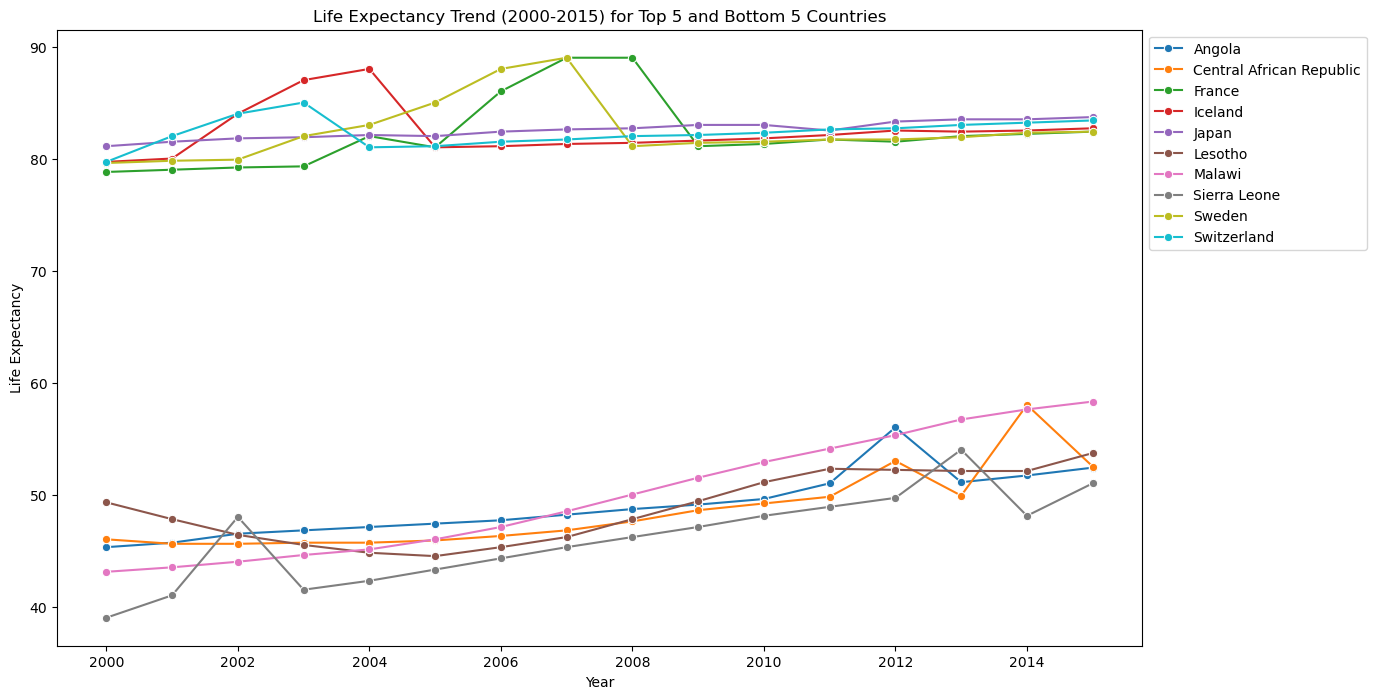


Identifying and plotting trends for the top 5 and bottom 5 countries in df2:
Top 5 countries with the highest life expectancy: ['Switzerland', 'Italy', 'Australia', 'Spain', 'Sweden']
Bottom 5 countries with the lowest life expectancy: ['Zimbabwe', 'Nigeria', 'Mozambique', "Cote d'Ivoire", 'Angola']


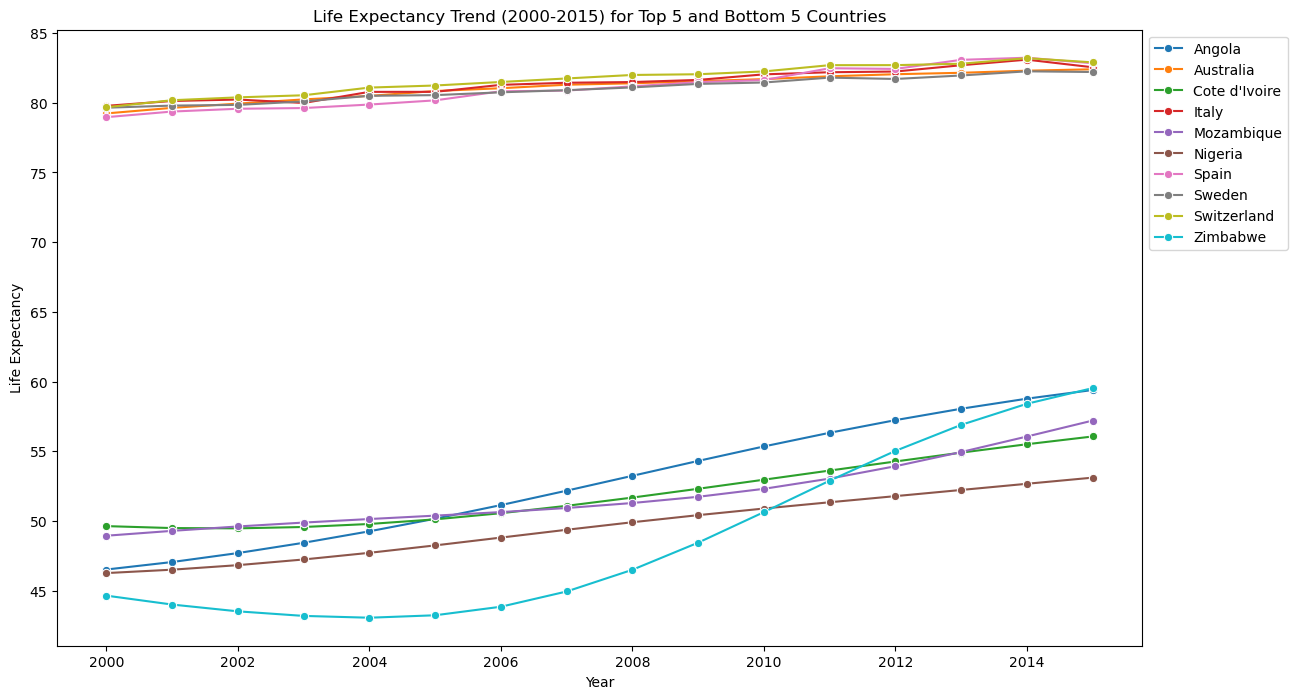

In [154]:
# Identify the top 5 and bottom 5 countries based on life expectancy 
def identify_and_plot_life_expectancy_trends(df, life_expectancy_column):
    # Calculate the mean life expectancy for each country
    mean_life_expectancy = df.groupby('Country')[life_expectancy_column].mean()

    # Identify the top 5 countries with the highest life expectancy
    top_5_countries = mean_life_expectancy.nlargest(5).index.tolist()

    # Identify the bottom 5 countries with the lowest life expectancy
    bottom_5_countries = mean_life_expectancy.nsmallest(5).index.tolist()

    # Print the top 5 and bottom 5 countries
    print(f"Top 5 countries with the highest life expectancy: {top_5_countries}")
    print(f"Bottom 5 countries with the lowest life expectancy: {bottom_5_countries}")

    # Filter the dataset to include only the top 5 and bottom 5 countries
    countries_of_interest = top_5_countries + bottom_5_countries
    trend_df = df[df['Country'].isin(countries_of_interest)]

    # Plot the trend from 2000 to 2015 for these countries
    plt.figure(figsize=(14, 8))
    sns.lineplot(data=trend_df, x='Year', y=life_expectancy_column, hue='Country', marker='o')
    plt.title('Life Expectancy Trend (2000-2015) for Top 5 and Bottom 5 Countries')
    plt.xlabel('Year')
    plt.ylabel('Life Expectancy')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

# Main script 
if __name__ == "__main__":
    print("\nIdentifying and plotting trends for the top 5 and bottom 5 countries in df1:")
    identify_and_plot_life_expectancy_trends(df1, 'Life expectancy')

    print("\nIdentifying and plotting trends for the top 5 and bottom 5 countries in df2:")
    identify_and_plot_life_expectancy_trends(df2, 'Life Expectancy')


In [1]:
#Text data anlysis 
import requests
from bs4 import BeautifulSoup
import pip
import matplotlib
import seaborn as sns
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import sys
!{sys.executable} -m pip install wordcloudimport os 
import sys
import nltk
import re 
from nltk.stem import WordNetLemmatizer 
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
import nltk
from nltk.tokenize import word_tokenize
from textblob import TextBlob
!pip install textblob
from textblob import TextBlob
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

ERROR: Could not find a version that satisfies the requirement wordcloudimport (from versions: none)
ERROR: No matching distribution found for wordcloudimport


In [5]:
#parsing the link 
url = 'https://online.aging.ufl.edu/2024/03/27/exploring-the-factors-that-affect-human-longevity/'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

In [7]:
text = ' '.join([p.get_text() for p in soup.find_all('p')])

In [9]:
type(text)

str

In [11]:
#creating stop words and converting to a list


stopwords = {'shouldn', 'this', 'll', 'few', "you'll", 'we', 'nor', 'not', 'o', 'here', 'over', 'yours', 'were', 'itself', 
             'our', 'whom', 'when', 'been', 'should', 'about', 'before', 'both', 'most', "don't", 'be', 'and', "you'd", 'until', 
             'hers', 'again', 'mightn', 'his', 'with', "that'll", 'these', 'isn', 'so', 'because', 've', 'more', 'same', 'will', 'm', 
             "doesn't", 'up', 'can', 'have', 'didn', 'out', 'each', 'who', 'don', 'at', "wasn't", 'does', "couldn't", 'being', 'then', 
             'couldn', 'against', 'just', 'your', 'its', 're', 'weren', 'where', "should've", 'from', 'of', 'once', "it's", "she's", 
             "aren't", 'their', "weren't", 'very', "you've", 'down', 'them', 'too', 'it', 'which', 'ain', 'in', 'under', 'won', 'now', 
             'needn', 'other', 'ourselves', 'themselves', 'having', 'd', 'is', 'you', "mustn't", 'shan', 'into', 'that', 'what', 
             'yourselves', 'was', 'has', 'theirs', 'some', "you're", 'on', 'than', 'ma', 'aren', 'wasn', 'after', 'below', "shouldn't", 'y', 
             'i', 'between', 'doesn', 'such', "wouldn't", 'hadn', 'hasn', 'am', 'him', 'for', 'my', 'no', 'her', 'why', 'mustn', 'me', 
             "hadn't", 'during', 'all', 'himself', 'haven', 'ours', 'only', 'had', 'but', 'did', "won't", 'she', "shan't", 'how', 'as',
             'if', 'further', 'while', 'herself', "needn't", "haven't", 'wouldn', "isn't", 'do', 't', 's', 'any', 'the', 'are', 'doing', 
             'own', 'there', 'or', 'those', 'they', 'above', 'to', 'he', 'a', 'yourself', 'through', 'myself', "hasn't", 'off', "mightn't", 
             "didn't", 'by', 'an'}
stopwords_list = list(stopwords)

In [13]:
#removing punctuation

text_cleaned = text.translate(str.maketrans('', '', string.punctuation))

print(text_cleaned)

In the last century there has been a remarkable increase in human life expectancy In 1900 the average life expectancy was around 32 years but over the years it has more than doubled to an average of 764 years in the United States  While a person’s genetics usually become more influential in determining their longevity later in life several other factors play a significant role from birth into adulthood and beyond In this article we’re dissecting three factors affecting life expectancy rate empowering people to make more conscientious efforts toward leading a long and healthy life  Longevity refers to the length of a person’s life from birth until death In today’s world we often use the term more loosely to describe an individual’s potential for a longer life To better understand longevity it’s essential to explore three of the main factors that play a role in a person’s ability to live a healthier and longer life  Given the diversity of global cultures and societal norms it’s unsurpris

In [15]:
#removing link from text 
text_remove = '''Sources\xa0httpsourworldindataorglifeexpectancyhttpswwwcdcgovnchsfastatslifeexpectancyhtmhttpswwwhealthlinecomnutritionbluezonesTOCTITLEHDR2httpswwwnaturecomarticless4301602300868whttpswwwmayoclinicorghealthylifestylefitnessindepthexerciseart20048389httpswwwncbinlmnihgovpmcarticlesPMC4866586httpswwwncbinlmnihgovpmcarticlesPMC3326242httpswwwcensusgovnewsroomstoriesolderamericansmonthhtml \nFeatures  \n      © 2024 University of Florida Health\n'''
# Remove URLs, non-alphabetic characters, and newlines
text_cleaned = re.sub(r'http\S+', '', text)  # Remove URLs
text_cleaned = re.sub(r'\\xa0', ' ', text_cleaned)  # Replace \xa0 with space
text_cleaned = re.sub(r'[^\w\s]', '', text_cleaned)  # Remove non-alphabetic characters
text_cleaned = text_cleaned.replace('\n', ' ')  # Remove newlines

#making everything lowercase
text_cleaned = text_cleaned.lower()

# Strip leading/trailing whitespaces
text_cleaned = text_cleaned.strip()

# Print the cleaned text
print(text_cleaned)

in the last century there has been a remarkable increase in human life expectancy in 1900 the average life expectancy was around 32 years but over the years it has more than doubled to an average of 764 years in the united states  while a persons genetics usually become more influential in determining their longevity later in life several other factors play a significant role from birth into adulthood and beyond in this article were dissecting three factors affecting life expectancy rate empowering people to make more conscientious efforts toward leading a long and healthy life  longevity refers to the length of a persons life from birth until death in todays world we often use the term more loosely to describe an individuals potential for a longer life to better understand longevity its essential to explore three of the main factors that play a role in a persons ability to live a healthier and longer life  given the diversity of global cultures and societal norms its unsurprising that

In [17]:
#initializing countvectorizer

vectorizer = CountVectorizer(stop_words=stopwords_list)

In [19]:
#changing extracted words to a Document Term Matrix 

X = vectorizer.fit_transform([text_cleaned])

In [21]:
#Creating a dataframe 

dtm_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

dtm_df.head()

,100,17,1900,20,2024,30,32,60,65,764,...,without,work,world,worlds,worth,years,younger,youre,youve,zones
0,1,1,1,1,1,1,1,1,1,2,...,3,1,2,1,1,4,2,1,2,1


In [23]:
X.shape

(1, 376)

In [29]:
#making sure only unique vaues are used 
df_combined = dtm_df.groupby(dtm_df.columns, axis=1).sum()

#making sure the grouping worked
unique_vals = df_combined.nunique()
unique_vals.max()

/var/folders/1t/94c3fx750_s361p4yp474qp80000gn/T/ipykernel_86648/1402063441.py:2: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df_combined = dtm_df.groupby(dtm_df.columns, axis=1).sum()


1

In [31]:
#putting terms in desc order 
sorted_columns = df_combined.iloc[0].sort_values(ascending=False)

#selecting top 20 
top_20_columns = sorted_columns.head(20)


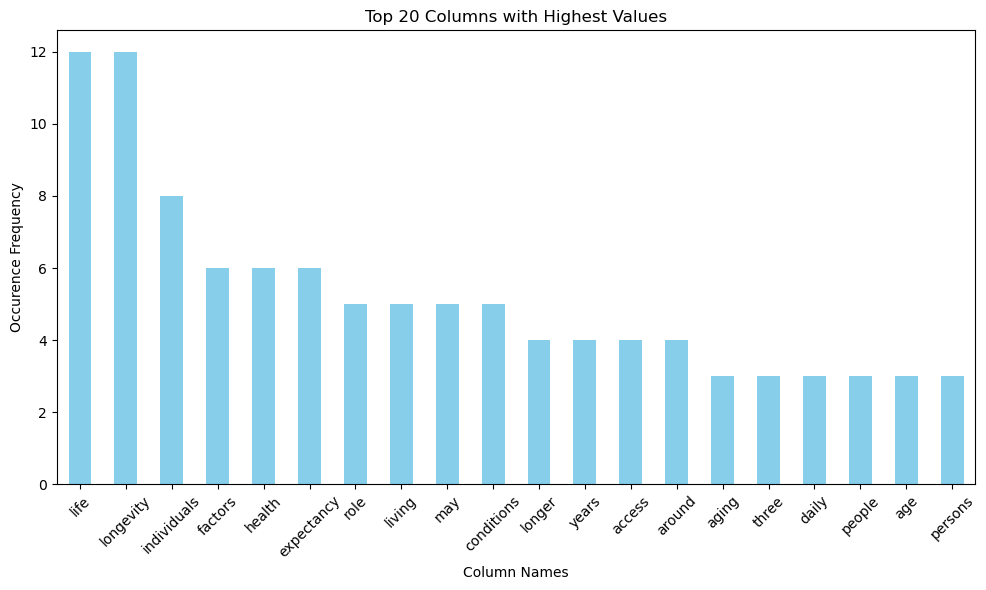

In [33]:
#plotting top 20 
top_20_columns.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 20 Columns with Highest Values')
plt.ylabel('Occurence Frequency')
plt.xlabel('Column Names')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [35]:
#now showing least frequent words 
desc_sorted_columns = df_combined.iloc[0].sort_values(ascending=True)

bottom_20_columns = desc_sorted_columns.head(20)


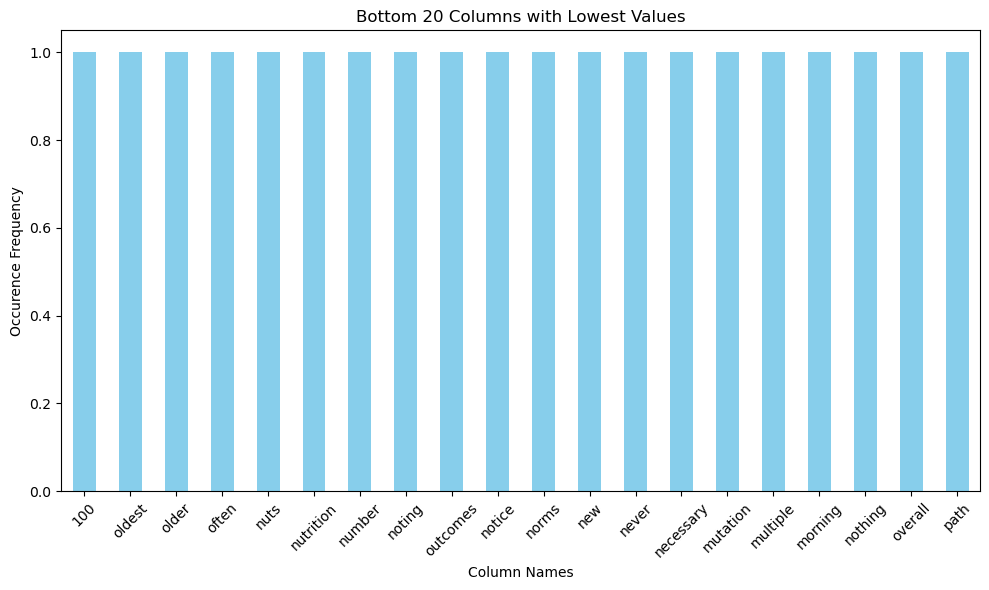

In [37]:
#plotting bottom 20 
bottom_20_columns.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Bottom 20 Columns with Lowest Values')
plt.ylabel('Occurence Frequency')
plt.xlabel('Column Names')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [39]:
#seeing how many words only occur once 

count_of_ones = (df_combined.iloc[0] == 1).sum()

print(f'Total words only appearing once: {count_of_ones}')

Total words only appearing once: 292


In [41]:
#creating df of words occuring more than once 
more_than_1 = df_combined.loc[:, df_combined.iloc[0] > 1]

#changing settings to allow all col names to be displayed 
pd.set_option('display.max_columns', None)


print(more_than_1)

   764  access  adopt  age  aging  areas  around  average  become  beyond  \
0    2       4      2    3      3      2       4        3       2       2   

   birth  breast  cancer  care  conditions  contribute  daily  diet  diseases  \
0      2       2       2     2           5           3      3     2         2   

   expectancy  expected  explore  factors  family  first  genetic  genetics  \
0           6         2        2        6       2      2        3         3   

   grains  health  healthcare  healthier  healthy  higher  history  impact  \
0       2       6           3          2        2       2        2       2   

   improved  including  increased  individuals  influence  instance  key  \
0         2          2          2            8          2         2    2   

   life  lifespan  lifestyle  lifestyles  likelihood  living  long  longer  \
0    12         3          2           3           3       5     2       4   

   longevity  many  may  ones  online  people  persons  

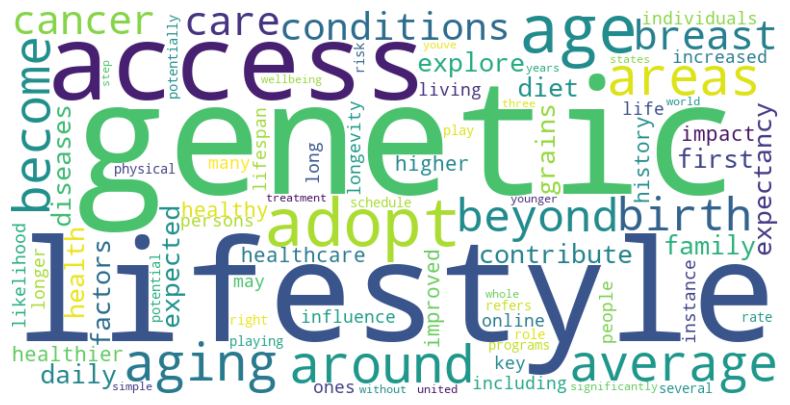

In [43]:
#converting df to string 

wc2 = ' '.join(more_than_1.columns)


#creating wordcloud 
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wc2)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.show()

In [45]:
#starting sentiment analysis

blob = TextBlob(text)


In [47]:
#running text blob sentiment
sentiment = blob.sentiment

In [49]:
#printing the sentiment polarity
# sentiment range [-1.0, 1.0] (negative, neutral, positive sentiment)

print(f"Polarity: {sentiment.polarity}")  
print(f"Subjectivity: {sentiment.subjectivity}") 

#polarity suggests that the text is neutral but leans toward positive
#subjectivity indicates there are some opinions present but there is more factual information than opinions. 

Polarity: 0.1036996336996337
Subjectivity: 0.43012183468705195


In [57]:
tokens = word_tokenize(text_cleaned)

In [59]:
#getting rid of the last 7 tokens since they are source information
tokens = tokens[:-7]

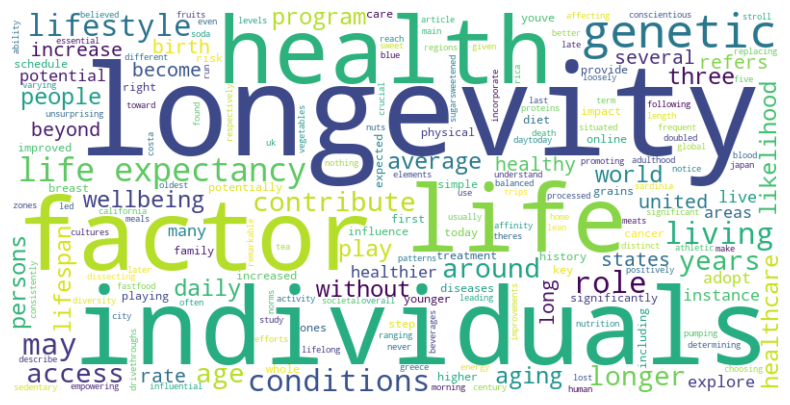

In [61]:
#creating wordcloud 
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_cleaned)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.show()

In [117]:
#TF-IDF analysis 
tfidf_vectorizer = TfidfVectorizer()


# Transform the text data into TF-IDF vectors
tfidf_matrix = tfidf_vectorizer.fit_transform(tokens)

# Normalize the TF-IDF matrix
tfidf_normalized = normalize(tfidf_matrix, norm='l2')

#create df
tfidf_normalized_df = pd.DataFrame(tfidf_normalized.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
print(tfidf_normalized_df)

     100   17  1900   20   30   32   60   65  764   90  ability  access  \
0    0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0     0.0   
1    0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0     0.0   
2    0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0     0.0   
3    0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0     0.0   
4    0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0     0.0   
..   ...  ...   ...  ...  ...  ...  ...  ...  ...  ...      ...     ...   
848  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0     0.0   
849  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0     0.0   
850  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0     0.0   
851  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0     0.0   
852  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0     0.0   

     account  activities  activity  address  adequate  adopt  adulthood  \
0        0.0         0.0

In [133]:
# Convert the normalized TF-IDF matrix to a dense array and flatten it
tfidf_dense = tfidf_normalized.toarray()
tfidf_flat = tfidf_dense.flatten()
tfidf_non_zero = tfidf_flat[tfidf_flat > 0]

In [163]:
import sklearn.manifold
from sklearn.manifold import TSNE

# Apply t-SNE to reduce dimensions to 2D
tsne = TSNE(n_components=2, random_state=0)
tsne_results = tsne.fit_transform(tfidf_matrix.toarray())

# Create a DataFrame for easy plotting
tsne_df = pd.DataFrame(tsne_results, columns=['Dimension 1', 'Dimension 2'])
tsne_df['document'] = tfidf_normalized_df.index



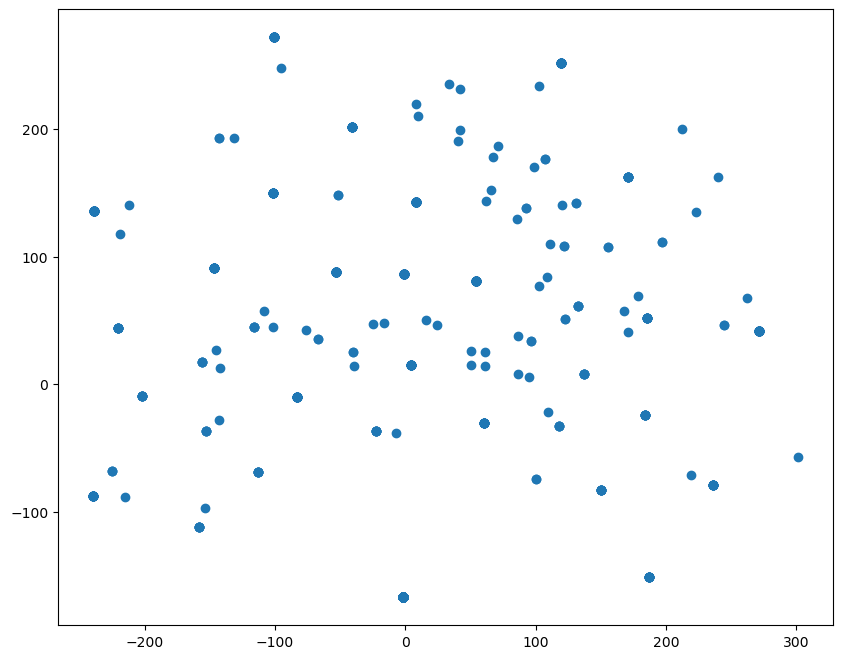

In [168]:
#visualizing frequency

plt.figure(figsize=(10, 8))
plt.scatter(tsne_df['Dimension 1'], tsne_df['Dimension 2'])